Team Members: Yasaman Ebrahimi, Jimmy Do, Nico Conanan, Stephen Hwang

# Introduction

This goal of this project is to predict who is most likely to have a heart attack based on risk factors such as age, sex, chest pain type, and many other factors. 

Currently, Heart Disease is the leading cause of death in the United States, and it accounts for around 20% of total deaths. According to the CDC, 805,000 people in the United States have a heart attack every year, and 20\% of people who have a heart attack don't realize what's happened to them. 

Additionally, the total medical cost of Heart Disease in the United States is $230 billion. 

By attempting to predict heart attacks early, treatment and prevention could be given early to save lives and reduce medical costs.

CDC Heart Disease Facts: https://www.cdc.gov/heartdisease/facts.htm

**Definitions**: 

  - Angina - a type of chest pain caused by reduced blood flow to the heart
  
  ![angina.png](angina.png)

$\ $

$\ $

$\ $

  - Electrocardiography - the process of producing a recording of the heart's electrical activity
  
  ![ecg.png](ecg.png)
  
  - Hypertrophy - the enlargement of an organ or tissue from the increase in size of its cells
  
  ![hypertrophy.png](hypertrophy.png)
  
  - Fluoroscopy - making a real-time video of the movements inside a part of the body by passing x-rays through the body
  
  ![fluoroscopy.jpg](fluoroscopy.jpg)
  
  - Thalassemia - an inherited blood disorder that causes your body to have less hemoglobin than normal

This project will use both a Logistic Regression Classifier and a Random Forest Classifier to predict whether a patient will have a heart attack based on their risk factors. We will then compare the accuracy of the results.

# Dataset

## Exploration

In [1]:
# all imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
heart = pd.read_csv('heart.csv').drop(['oldpeak', 'slp'], axis=1)
heart.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,thall,output
0,63,1,3,145,233,1,0,150,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,2,1
2,41,0,1,130,204,0,0,172,0,0,2,1


Raw Data: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [3]:
heart.describe().loc[['mean', 'min', '25%', '75%', 'max']]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,thall,output
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.729373,2.313531,0.544554
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,1.000000


**Features:**

 - Age 
     - numerical, 29 years - 77 years
 - Sex 
     - categorical, 1 = male, 0 = female
 - CP (Chest Pain Type)
     - 3 = asymptomatic
     - 0 = typical angina
     - 1 = atypical angina
     - 2 = non-anginal pain
 - TrtBPS (Resting Blood Pressure)
     - numerical, 94 mmHg - 200 mmHg
 - Chol (Serum Cholesterol)
     - numerical, 126 mg/dL - 564 mg/dL
 - FBS (Fasting Blood Sugar)
     - categorical, 1 if > 120 mg/dL, 0 else
 - RestECG (Resting electrocardiographic)
     - 0 = hypertrophy
     - 1 = normal
     - 2 = having ST-T wave abnormality
 - Thalachh (Maximum Heart Rate)
     - numerical, 71 bmp - 202 bmp
 - Exng (exercise induced angina)
     - categorical, 1 = yes, 0 = no
 - CAA (number of major vessels colored by Fluoroscopy)
     - numerical, 0 vessels - 4 vessels
 - Thall (effect of Thalessemia)
     - 1 = fixed defect
     - 2 = normal
     - 3 = reversible defect
 - Output
     - 0 = low heart attack chance
     - 1 = high heart attack chance

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

In [4]:
def bar_plot(col):
    plt.figure(figsize = (6, 4))
    heart_attack = heart[heart['output'] == 1]
    no_heart_attack = heart[heart['output'] == 0]
    heart_attack_percent = heart_attack[col].value_counts() / heart_attack.shape[0]
    no_heart_attack_percent = no_heart_attack[col].value_counts() / no_heart_attack.shape[0]
    feature = heart_attack[col].unique()
    count = len(feature)
    plt.bar(feature - 0.2, heart_attack_percent, 0.4, label='heart attack')
    plt.bar(feature + 0.2, no_heart_attack_percent, 0.4, label='no heart attack')
    plt.xticks(feature)
    plt.xlabel(col), plt.ylabel('Percent')
    plt.title(col + ' based on heart attack diagnoses')
    plt.legend();
    
    
def hist_plot(col):
    plt.figure(figsize = (6, 4))
    heart_attack = heart[heart['output'] == 1]
    no_heart_attack = heart[heart['output'] == 0]
    plt.hist(heart_attack[col], ec='white', density=True, alpha=0.5, label='heart attack')
    plt.hist(no_heart_attack[col], ec='white', density=True, alpha=0.5, label='no heart attack')
    plt.xlabel(col), plt.ylabel('Density')
    plt.title(col + ' of patients based on heart attack diagnoses')
    plt.legend();

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Age

This is a numerical feature that ranges from 29 years - 77 years. 

Counterintuitively, the people who have heart attacks are more likely to be slightly younger. This could indicate a potential confounding factor in the dataset.

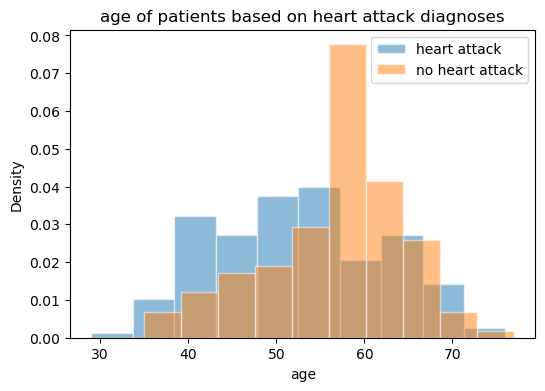

In [5]:
hist_plot('age')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Sex

This is a categorical feature with 1 being male and 0 being female.

Females were more likely to have heart attacks than males were. This feature will be one-hot-encoded.

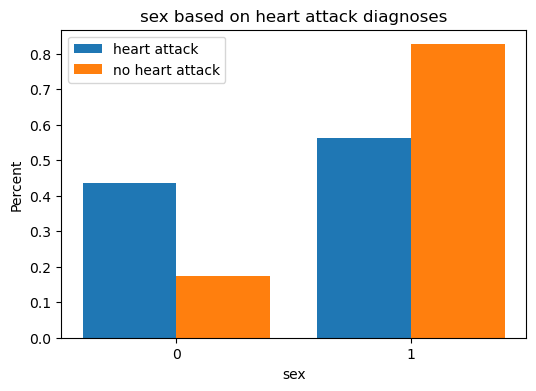

In [6]:
bar_plot('sex')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Chest Pain

This is a categorical feature, with 3 being asymptomatic, 0 being typical angina, 1 being atypical angina, and 2 being non-anginal pain. 

People who had heart attacks on average experienced more level 0-2 pain than people who did not have a heart attack. This feature will be one-hot-encoded.

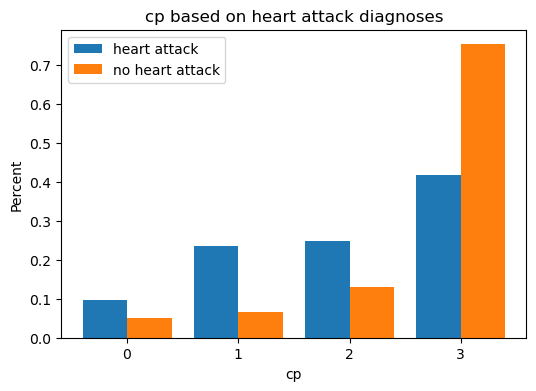

In [7]:
bar_plot('cp')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Resting Blood Pressure

This is a numerical feature ranging from 94 mmHg - 200 mmHg. 

Patients who experienced heart attacks on average had lower blood pressure than patients who did not experience heart attacks.

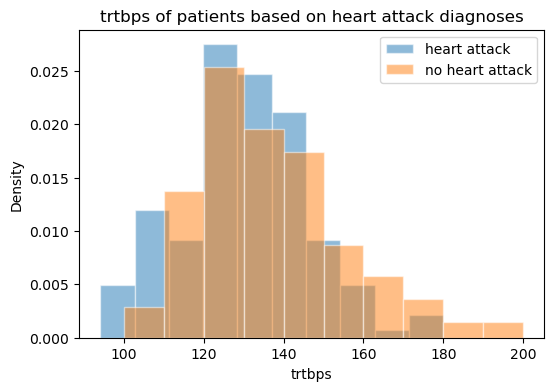

In [8]:
hist_plot('trtbps')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Serum Cholestrol

This is a numerical feature ranging from 126 mg/dL - 564 mg/dL.

Patients who had heart attacks on average had lower serum cholestrol levels than people who did not have a heart attack.

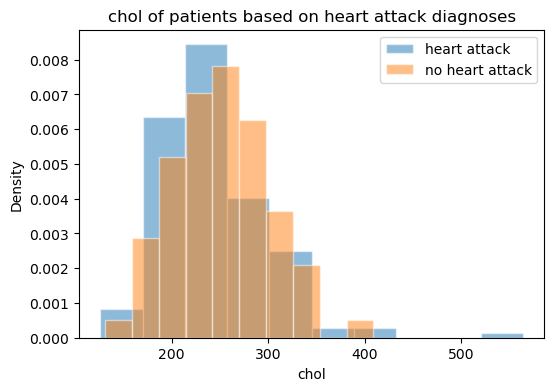

In [9]:
hist_plot('chol')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Fasting Blood Sugar

This is a categorical feature, with 1 if the blood sugar is greater than 120 mg/dL and 0 if not.

People who had a heart attack on average had slightly higher blood sugar than people who did not have a heart attack. This feature will be one-hot-encoded.

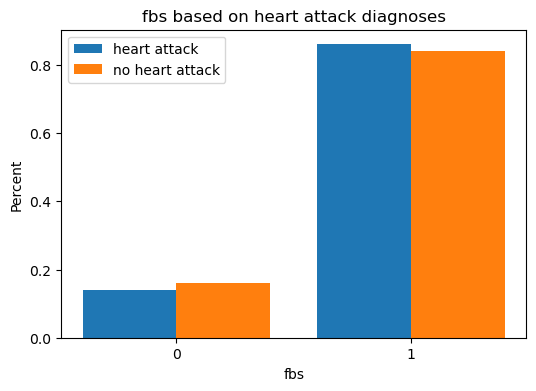

In [10]:
bar_plot('fbs')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Resting ECG

This is a categorical feature, with 0 being hypertrophy, 1 being normal, and 2 being ST-T wave abnormality.

On average, people with a heart attack experienced slightly more hypertrophy than people without a heart attack. This feature will be one-hot-encoded.

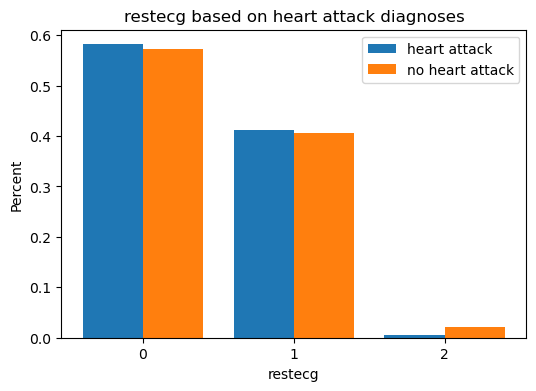

In [11]:
bar_plot('restecg')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Maximum Heart Rate

This is a numerical feature ranging from 71 bmp - 202 bmp.

On average, people with a heart attack achieve much higher heart rates than people without a heart attack.

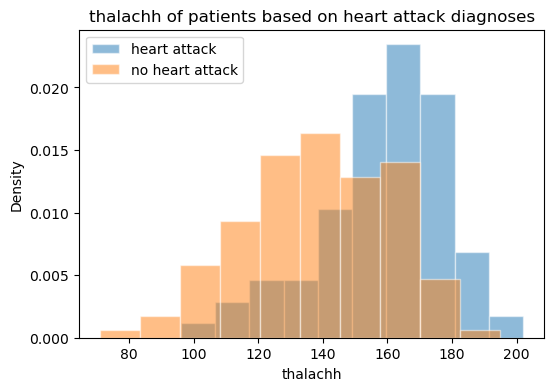

In [12]:
hist_plot('thalachh')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Exercise-Induced Angina

This is a categorical feature, with 1 meaning yes and 0 meaning no.

People who had a heart attack on average did not experience exercise-induced angina. This is counterintuitive to what we would expect, and there could be a confounding factor in the data. This feature will be one-hot-encoded.

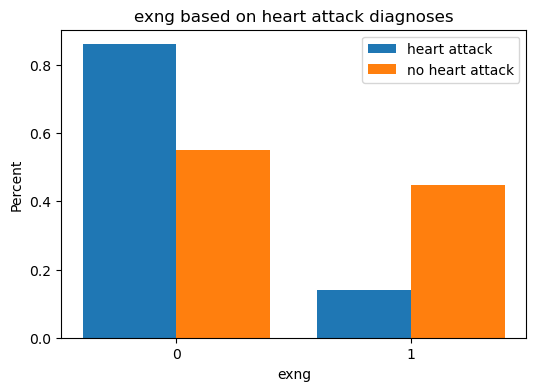

In [13]:
bar_plot('exng')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Vessels appearing in Fluoroscopy

This is a numerical feature ranging from 0 vessels - 4 vessels.

On average, people experiencing a heart attack did not have any blood vessels that showed up on their fluoroscopy.

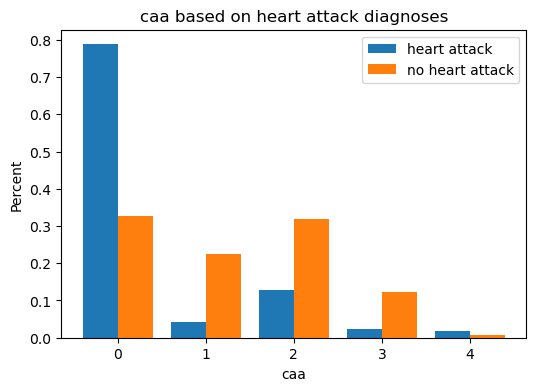

In [14]:
bar_plot('caa')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

### Effect of Thalessemia

This is a categorical feature with 1 meaning having a fixed defect, 2 meaning normal, and 3 meaning reversable defect.

On average, people experiencing a heart attack had a fixed defect due to thalessemia moreso than people not experiencing a heart attack. This feature will be one-hot-encoded.

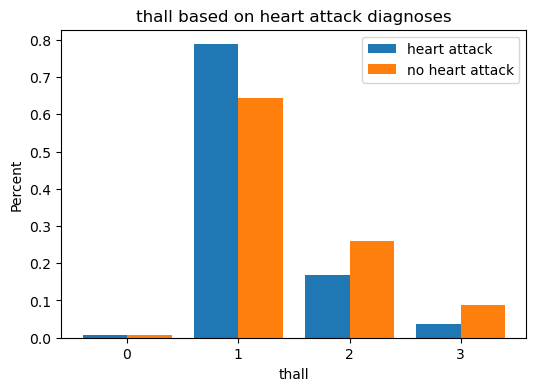

In [15]:
bar_plot('thall')

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

## Feature Engineering

In [16]:
heart['cp'] = heart['cp'].astype(str)
heart['thall'] = heart['thall'].astype(str)
heart['restecg'] = heart['restecg'].astype(str)
heart = pd.get_dummies(heart)
heart.head(3)

,age,sex,trtbps,chol,fbs,thalachh,exng,caa,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,0,1,0,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,0,1,0,1,0,0,1,0,0,0,0,1,0


$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

# Method

The first method we will be testing is a Logistic Regression Classifier. Logistic regression works by computing the log-odds of the linear combination of all the features. The parameters, or coefficients, of each feature are computed and then a sigmoid function is used to classify the data as either 0 or 1. 

![sigmoid.png](sigmoid.png)

The second method for this research question is a Random Forest Classifier. A Random Forest Classifier works by taking the majority vote on some number of decision trees to classify based on available features.

![random_forest.png](random_forest.png)

Each time, a boostrapped sample of the data is taken and a decision tree classifier is made. All the decision trees make an attempt at classifying the data, and then the majority vote is taken as the final output. The random forest will automatically compute the best split point for each feature.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

Create test set, training set, and validation set

In [17]:
train, test = train_test_split(heart, test_size=0.2, random_state=42)
train, validation = train_test_split(train, test_size=0.15, random_state=42)
X_train, Y_train = train.drop('output', axis=1), train['output']
X_val, Y_val = validation.drop('output', axis=1), validation['output']
X_test, Y_test = test.drop('output', axis=1), test['output']

Logistic Regression: Hyperparameter tuning for validation accuracy

In [18]:
penalties = ['none', 'l2']
Cs = [0.01, 0.1, 1, 10, 100]
fit_intercepts = [True, False]
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
combinations = product(penalties, Cs, fit_intercepts, solvers)
best_clf_lr, best_val_accuracy_lr = 0, 0
for penalty, C, fit_intercept, solver in combinations:
    model = LogisticRegression(
        penalty = penalty,
        C = C,
        fit_intercept = fit_intercept,
        solver = solver,
        random_state = 42
    )
    model.fit(X_train, Y_train)
    Y_val_preds = model.predict(X_val)
    val_accuracy = accuracy_score(Y_val_preds, Y_val)
    if val_accuracy > best_val_accuracy_lr:
        best_val_accuracy_lr = val_accuracy
        best_clf_lr = model
        
best_val_accuracy_lr, best_clf_lr

(0.7567567567567568,
 LogisticRegression(C=0.1, random_state=42, solver='newton-cg'))

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

Random Forest Classifier: Hyperparameter tuning for validation accuracy

In [19]:
n_estimators = [100, 200]
criterions = ['gini', 'entropy', 'log_loss']
max_depths = [2, 3, 5, 6, 7, None]
min_samples_splits = [2, 3, 4]
max_features = ['sqrt', 'log2', None]
combinations = product(n_estimators, criterions, max_depths, min_samples_splits, max_features)
best_clf_rf, best_val_accuracy_rf = 0, 0
for n_estimator, criterion, max_depth, min_samples_split, max_feature in combinations:
    model = RandomForestClassifier(
        n_estimators = n_estimator,
        criterion = criterion,
        max_depth = max_depth,
        min_samples_split = min_samples_split,
        max_features = max_feature,
        random_state = 42
    )
    model.fit(X_train, Y_train)
    Y_val_preds = model.predict(X_val)
    val_accuracy = accuracy_score(Y_val_preds, Y_val)
    if val_accuracy > best_val_accuracy_rf:
        best_val_accuracy_rf = val_accuracy
        best_clf_rf = model
        
best_val_accuracy_rf, best_clf_rf

(0.7837837837837838,
 RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=3,
                        random_state=42))

Prediction on test set

In [20]:
Y_preds_test_lr = best_clf_lr.predict(X_test)
Y_preds_test_rf = best_clf_rf.predict(X_test)
test_accuracy_lr = accuracy_score(Y_preds_test_lr, Y_test)
test_accuracy_rf = accuracy_score(Y_preds_test_rf, Y_test)
print('Test Accuracy of Logistic Regression:\t', np.round(test_accuracy_lr*100, 3), '%')
print('Test Accuracy of Random Forest:\t\t', np.round(test_accuracy_rf*100, 3), '%')

Test Accuracy of Logistic Regression:	 90.164 %
Test Accuracy of Random Forest:		 91.803 %


# Results and Conclusion

The optimized random forest had a test accuracy of 91.803%, and the optimized logistic regression had a test accuracy of 90.164%. In comparison as was expected, the random forest out-performed the logistic regression. This means that in 91.803% of new cases, the random forest classifier was able to predict whether or not the person would have a heart attack based on their risk factors.

Given a person's age, sex, blood pressure, cholestrol, blood sugar, ecg results, heart rate, chest pain, blood vessel count, and history of Thalessemia, our model was able to accurately predict whether or not that person would have a heart attack. These are all risk factors that could be easily measured in a doctor's visit and could give life-saving information about an impending heart attack to someone.

With a positive prediction from this classifier, prevention measures could be taken to lessen the risk of a heart attack and/or a treatment plan could be made in advance. This means that someone's life could be saved or the cost of their medical treatments could be lowered.

Although this classifier could be a great tool for predicting heart attacks, there is still some work that needs to be done before this can be used in the real world. A medical ethics board should discuss the implications of a false positive or false negative classification, and should fine-tune the classifier to optimize for the ethical ratio of false positives to false negatives. The metric we used to evaluate the classifier was accuracy, but there are other metrics that could be used depending on the goal.

Overall, this classifier is a great first step in flagging potential heart attacks, and with some fine tuning could result in more readiness to deal with an impending heart attack.